In [98]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [58]:
cars = pd.read_csv('used_cars.csv')

In [59]:
cars.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


## Handle column names - make lowercase

In [60]:
cars.columns = [c.lower() for c in cars]

## Train/Test Split

In [61]:
train, test = train_test_split(cars)

In [62]:
X, y = train[['year', 'mileage']], train.price

In [63]:
X.shape

(223424, 2)

In [64]:
X.head()

,year,mileage
32922,2015,85761
180347,2014,36081
152490,2018,5118
141734,2011,69474
143069,2016,20972


In [65]:
y.shape

(223424,)

## Basic Cross-Validation

- this will return a score for every split.

In [66]:
lr = LinearRegression()
cross_val_score(lr, X, y, cv=10).mean() # the avg r^2 score for all cv=10

0.2173288940275276

In [67]:
tree = DecisionTreeRegressor(max_depth=2)
cross_val_score(tree, X, y, cv=10).mean()

0.22722479836049927

In [68]:
tree = DecisionTreeRegressor(max_depth=4)
cross_val_score(tree, X, y, cv=10).mean()

0.26097735613620066

In [69]:
# if you want the MSE score instead of r^2

from sklearn.metrics import mean_squared_error, make_scorer

cross_val_score(lr, X, y, cv=4, scoring=make_scorer(mean_squared_error)).mean()

153927150.69636863

# Grid Search CV

In [70]:
tree = DecisionTreeRegressor()

In [71]:
params = {
    'max_depth': range(1, 21),
    'splitter': ['best', 'random']
}

In [72]:
grid = GridSearchCV(tree, params, cv=4, scoring=make_scorer(mean_squared_error))


In [73]:
grid.fit(X, y)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 21),
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_

In [74]:
results = grid.cv_results_  # _ means derived value, from the model

In [75]:
results['mean_test_score']

array([1.66243084e+08, 1.82037998e+08, 1.51924790e+08, 1.73038951e+08,
       1.47484146e+08, 1.75558493e+08, 1.45475624e+08, 1.64382769e+08,
       1.44147317e+08, 1.52107610e+08, 1.43661766e+08, 1.53009533e+08,
       1.45769809e+08, 1.51288961e+08, 1.47416254e+08, 1.51960691e+08,
       1.49336107e+08, 1.49880258e+08, 1.53214976e+08, 1.46466704e+08,
       1.56704423e+08, 1.49917680e+08, 1.61581507e+08, 1.46023382e+08,
       1.66205330e+08, 1.48877893e+08, 1.70806258e+08, 1.48557309e+08,
       1.75705596e+08, 1.58188404e+08, 1.80056874e+08, 1.54539399e+08,
       1.84799263e+08, 1.59723674e+08, 1.89467342e+08, 1.66044757e+08,
       1.95225707e+08, 1.78051738e+08, 1.99419984e+08, 1.72380656e+08])

## Create a df to hold the results of the crossvalidation

In [76]:
for params, score in zip(results['params'], results['mean_test_score']):
    params['score'] = score
    
df = pd.DataFrame(results['params'])
df

,max_depth,score,splitter
0,1,1.662431e+08,best
1,1,1.820380e+08,random
2,2,1.519248e+08,best
3,2,1.730390e+08,random
4,3,1.474841e+08,best
5,3,1.755585e+08,random
6,4,1.454756e+08,best
7,4,1.643828e+08,random
8,5,1.441473e+08,best
9,5,1.521076e+08,random


In [77]:
df.sort_values(by='score')

,max_depth,score,splitter
10,6,1.436618e+08,best
8,5,1.441473e+08,best
6,4,1.454756e+08,best
12,7,1.457698e+08,best
23,12,1.460234e+08,random
19,10,1.464667e+08,random
14,8,1.474163e+08,best
4,3,1.474841e+08,best
27,14,1.485573e+08,random
25,13,1.488779e+08,random


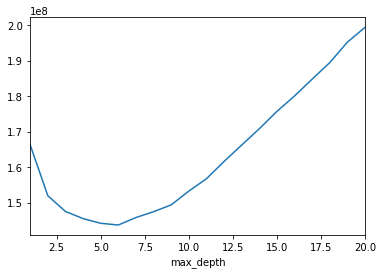

In [79]:
%matplotlib inline

df[df.splitter == 'best'].set_index('max_depth').score.plot()

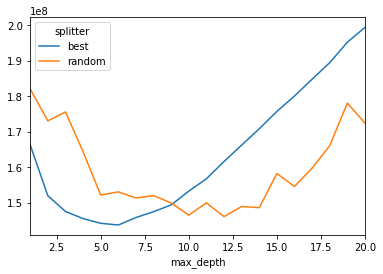

In [80]:
df.pivot_table('score', 'max_depth', 'splitter').plot()

## Continue with cars df in curric and exercises

In [81]:
cars.head(1)

,id,price,year,mileage,city,state,vin,make,model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience


## Set the id column as the index

In [82]:
cars.set_index('id', inplace=True)

In [83]:
cars.head(1)

,price,year,mileage,city,state,vin,make,model
id,,,,,,,,
1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience


In [84]:
print(f'The cars dataframe has {cars.shape[0]} rows and {cars.shape[1]} columns.')

The cars dataframe has 297899 rows and 8 columns.


## Construct a feature that conveys whether the car sold for more than the average price considering its make, model, year

In [91]:
cars['avg_salesprice'] = cars.groupby(['year', 'make', 'model']).price.transform('mean')

In [93]:
cars['above_avg'] = (cars.price > cars.avg_salesprice).astype(int)

In [94]:
cars.head()

,price,year,mileage,city,state,vin,make,model,avg_salesprice,above_avg
id,,,,,,,,,,
1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience,17291.768786,0
2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD,16721.350598,0
3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather,19080.632911,0
4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD,16721.350598,0
5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience,17291.768786,0


## Remove features not needed for modeling

In [96]:
cars.drop(columns=['price', 'city', 'vin', 'avg_salesprice'], inplace=True)

In [97]:
cars.head()

,year,mileage,state,make,model,above_avg
id,,,,,,
1,2015,18681,MO,Buick,EncoreConvenience,0
2,2015,27592,IN,Buick,EncoreFWD,0
3,2015,13650,NC,Buick,EncoreLeather,0
4,2015,25195,LA,Buick,EncoreFWD,0
5,2015,22800,NV,Buick,EncoreConvenience,0


## Encode the categorical columns

In [99]:
for col in ['state', 'make', 'model', 'year']:
    le = LabelEncoder().fit(cars[col])
    cars[col] = le.transform(cars[col])

In [100]:
cars.head()

,year,mileage,state,make,model,above_avg
id,,,,,,
1,18,18681,28,7,523,0
2,18,27592,19,7,525,0
3,18,13650,32,7,526,0
4,18,25195,22,7,525,0
5,18,22800,38,7,523,0


## Split data into Train and Test

In [101]:
X, y = cars.drop(columns='above_avg'), cars.above_avg

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## Basic Cross Validation

In [103]:
tree = DecisionTreeClassifier(max_depth=2)

In [105]:
# using default accuracy metric for classifiers

cross_val_score(tree, X_train, y_train, cv=3).mean()

0.5908802880649531

### Using a different metric for classifiers

In [106]:
cross_val_score(tree, X_train, y_train, cv=3, scoring='precision').mean()

0.5929473536676784

In [107]:
cross_val_score(tree, X_train, y_train, cv=3, scoring='recall').mean()

0.4015709904772153

In [108]:
cross_val_score(tree, X_train, y_train, cv=3, scoring='f1').mean()

0.478555049451769

## Grid Search CV